# Reading a DM3 File with ScopeReader

**Gerd Duscher**

10/09/2020

**This document is a simple example of how to read DM3 Files into the sidpy dataformat**

**UNDER CONSTRUCTION**

## Introduction

Digital Micrograph from Gatan runs on many TEMs for data acquisition.
We read and plot such files here.

## Import all necessary packages

There are a few setup procedures that need to be followed before any code is written. In this step, we simply load a
few python packages that will be necessary in the later steps.


In [2]:
%pylab notebook
%gui qt

import sys
from sidpy.io.interface_utils import openfile_dialog
sys.path.append('../')
from ScopeReaders.em.tem.dm3_reader import DM3Reader
import ScopeReaders
print('ScopeReaders version: ', ScopeReaders.__version__)
import sidpy
print('sidpy version: ', sidpy.__version__)

Populating the interactive namespace from numpy and matplotlib
ScopeReaders version:  0.0.1
sidpy version:  0.0.3


## Open a file dialog

Here we select the name of the file to open. We will be using the sidpy interface to do that.

The ``openfile_dialog`` will open QT file dialog to select a file.

For examples go to the ``example_data`` directory in the original folder of this notebook.

Note.: in some operating systems the window will not show up on top, look in your task bar.

In [3]:
file_name = openfile_dialog()
print(file_name)

C:/Users/gduscher/Documents/GitHub/ScopeReaders/notebooks/example_data/EELS_STO.dm3


###  Catch a bad selection or cancelling of file selection

In [4]:
if len(file_name) < 3 or file_name[-4:] != '.dm3':
    print('File not supported')

## Read file
We use the ScopeReader to read the file into a sidpy dataset.
All metadata (absolutely everything) is saved in the ``original_metadata`` attribute
of the sidpy Dataset. If the selected file is not a dm3 File you get an ``IOError``.

In [5]:
dm3_reader = DM3Reader(file_name)
dataset = dm3_reader.read()

print(dataset)
dataset

sidpy.Dataset of type SPECTRUM with:
 dask.array<EELS_STO, shape=(2048,), dtype=float32, chunksize=(2048,), chunktype=numpy.ndarray>
 data contains: intensity (counts)
 and Dimensions: 
  energy_loss:  energy-loss (eV) of size (2048,)


sidpy.Dataset of type SPECTRUM with:
 dask.array<EELS_STO, shape=(2048,), dtype=float32, chunksize=(2048,), chunktype=numpy.ndarray>
 data contains: intensity (counts)
 and Dimensions: 
  energy_loss:  energy-loss (eV) of size (2048,)

## Plot File
Only one command is necessary to plot the file.

<IPython.core.display.Javascript object>


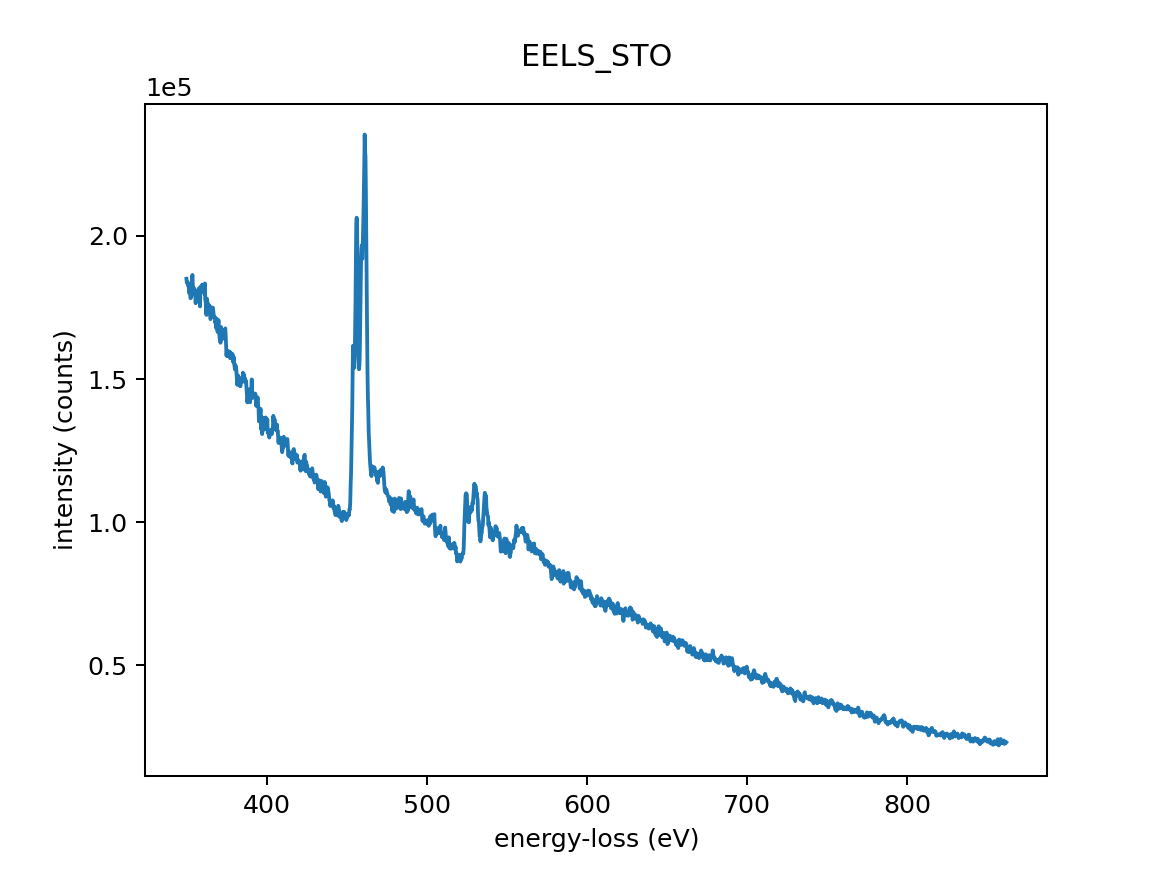

In [6]:
dataset.plot()

## DM3 Original Metadata
Digital micrograph stores a lot of metadata in the file and we read all of them and store that information in the ``original_metadata``. 

In [6]:
dataset.view_original_metadata()

DM :
	file_version : 3
	file_size : 322611
	chosen_image : 1
	full_file_name : C:/Users/gduscher/Documents/GitHub/ScopeReaders/notebooks/example_data/EELS_STO.dm3
ApplicationBounds : [0, 0, 1065, 1916]
DocumentObjectList :
	0 :
		AnnotationGroupList :
		AnnotationType : 20
		BackgroundColor : [-1, -1, -1]
		BackgroundMode : 2
		FillMode : 2
		ForegroundColor : [-1, 0, 0]
		HasBackground : False
		ImageDisplayInfo :
			BackgroundColor : [-5655, -5655, -5655]
			BackgroundOn : True
			CalibrationSliceId :
				0 : 0
			CaptionAttributes : 7
			CaptionColor : [0, 0, 0]
			CaptionFaceName : Lucida Sans Unicode
			CaptionOn : True
			CaptionSize : 10
			CursorOn : False
			CursorPosition : 0.0
			DimensionLabels :
				0 : 
			DynamicContrast : True
			FrameOn : True
			GridColor : [0, -1, -1]
			GridOn : True
			GroupId : 0
			GroupList :
				0 :
					DoAutoSurveyHigh : True
					DoAutoSurveyLow : True
					GroupToDisplay :
						Offset : [-0.0, -0.0]
						Scale : [0.00048828125, 4.16666489